In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ImportError: No module named 'seaborn'

In [ ]:
data_1 = pd.read_csv(r"E:\Aegis\AV\Trip History Data Set/2015-Q1-Trips-History-Data.csv")
data_2 = pd.read_csv(r"E:\Aegis\AV\Trip History Data Set/2015-Q2-Trips-History-Data.csv")
data_3 = pd.read_csv(r"E:\Aegis\AV\Trip History Data Set/2015-Q3-cabi-trip-history-data.csv")
data_4 = pd.read_csv(r"E:\Aegis\AV\Trip History Data Set/2015-Q4-Trips-History-Data.csv")

In [ ]:
print data_1.columns

In [4]:
print data_2.columns

Index([u'Duration (ms)', u'Start date', u'Start station', u'End date',
       u'End station', u'Bike number', u'Subscription type'],
      dtype='object')


In [5]:
print data_3.columns

Index([u'Duration (ms)', u'Start date', u'End date', u'Start station number',
       u'Start station', u'End station number', u'End station', u'Bike #',
       u'Member type'],
      dtype='object')


In [6]:
print data_4.columns

Index([u'Duration (ms)', u'Start date', u'End date', u'Start station number',
       u'Start station', u'End station number', u'End station', u'Bike #',
       u'Member type'],
      dtype='object')


Since the column names are different, first we make sure that all data sets have same column names. Then we delete the columns -"Start station number" and "End station number" from data sets 3 and 4. Then we combine all four datasets together as one.

In [7]:
del data_3['Start station number']
del data_3['End station number']
del data_4['Start station number']
del data_4['End station number']

In [8]:
data_3['Bike number'] = data_3['Bike #']
data_4['Bike number'] = data_4['Bike #']
del data_3['Bike #']
del data_4['Bike #']
###
data_1['Duration (ms)'] = data_1['Total duration (ms)']
del data_1['Total duration (ms)']

#
data_3['Subscription type'] = data_3['Member type']
data_4['Subscription type'] = data_4['Member type']
del data_3['Member type']
del data_4['Member type']
data_1['Subscription type'] = data_1['Subscription Type']
del data_1['Subscription Type']

In [9]:
data_1['Quater'] = 1
data_2['Quater'] = 2
data_3['Quater'] = 3
data_4['Quater'] = 4

In [10]:
data_1['Duration_min'] = data_1['Duration (ms)']/(60*1000)
data_2['Duration_min'] = data_2['Duration (ms)']/(60*1000)
data_3['Duration_min'] = data_3['Duration (ms)']/(60*1000)
data_4['Duration_min'] = data_4['Duration (ms)']/(60*1000)

In [11]:
data = pd.concat([data_1, data_2, data_3, data_4])

In [12]:
#Check for Null values in the data set
data.apply(lambda x: sum(x.isnull()))

Bike number          0
Duration (ms)        0
Duration_min         0
End date             0
End station          0
Quater               0
Start date           0
Start station        0
Subscription type    0
dtype: int64

In [13]:
data.head()

,Bike number,Duration (ms),Duration_min,End date,End station,Quater,Start date,Start station,Subscription type
0,W00612,2394764,39.912733,1/1/2015 0:42,15th & K St NW,1,1/1/2015 0:02,Constitution Ave & 2nd St NW/DOL,Casual
1,W01140,2389161,39.819350,1/1/2015 0:42,15th & K St NW,1,1/1/2015 0:02,Constitution Ave & 2nd St NW/DOL,Casual
2,W01226,468047,7.800783,1/1/2015 0:12,20th & O St NW / Dupont South,1,1/1/2015 0:04,20th & E St NW,Registered
3,W20216,348068,5.801133,1/1/2015 0:13,15th & Euclid St NW,1,1/1/2015 0:07,Park Rd & Holmead Pl NW,Registered
4,W21005,980844,16.347400,1/1/2015 0:25,Thomas Circle,1,1/1/2015 0:09,Jefferson Dr & 14th St SW,Casual


There are no null values in the data set Now we perform following Analysis on the data set

    First we export data to a csv file
    We first analyse which are most used staion for overall year
    Which are most used bikes for overall year 2015
    Which quater has high range of business
    Which month has high range of business
    What is average duration for casual vs regualr users



In [14]:
data.to_csv("Trip_History_2015_data.csv")

Since it is already mentioned that trips which are of duration less than 60 seconds are test rides., First we remove those from our data set

In [15]:
data_new = data.loc[data['Duration (ms)']>60000]

In [16]:
#Check for no of categorical variables in the data
data_new.apply(lambda x: len(x.unique()))

Bike number             3582
Duration (ms)        1552650
Duration_min         1552650
End date              409647
End station              364
Quater                     4
Start date            409626
Start station            364
Subscription type          3
dtype: int64

In [17]:
print data_new['Subscription type'].value_counts()

Registered    1767898
Member         740948
Casual         676068
Name: Subscription type, dtype: int64


In [18]:
data_new['Subscription type'][data_new['Subscription type'] =="Member"] = "Registered"

C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\pandas\core\generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns

In [19]:
print data_new['Subscription type'].value_counts()

Registered    2508846
Casual         676068
Name: Subscription type, dtype: int64


In [20]:
#Analysis based on Most used station in the year 2015
print data_new['Start station'].value_counts().head(10)

Columbus Circle / Union Station         70476
Lincoln Memorial                        69555
Jefferson Dr & 14th St SW               57925
Massachusetts Ave & Dupont Circle NW    55818
15th & P St NW                          41232
Thomas Circle                           39888
New Hampshire Ave & T St NW             35841
Jefferson Memorial                      35691
14th & V St NW                          35683
17th & Corcoran St NW                   31424
Name: Start station, dtype: int64


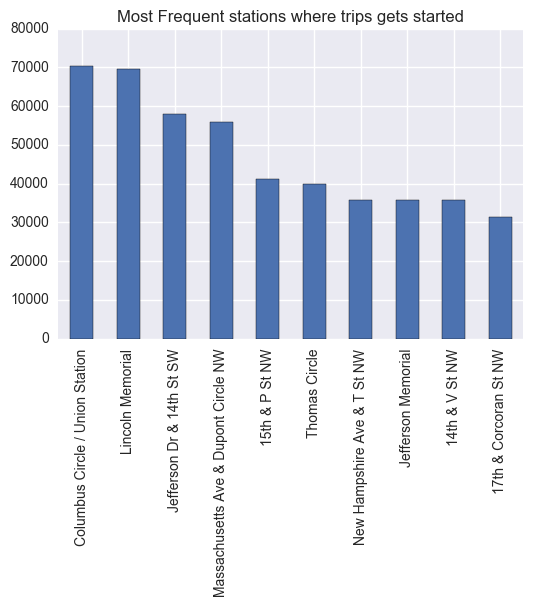

In [21]:
%matplotlib inline
l =  data_new['Start station'].value_counts().head(10)
l.plot(kind = 'bar', title = "Most Frequent stations where trips gets started")

In [22]:
#Analysis based on Most used station in the year 2015
print data_new['End station'].value_counts().head(10)

Columbus Circle / Union Station         72590
Lincoln Memorial                        69395
Massachusetts Ave & Dupont Circle NW    64143
Jefferson Dr & 14th St SW               59426
15th & P St NW                          44906
14th & V St NW                          39205
Thomas Circle                           38550
Jefferson Memorial                      36299
New Hampshire Ave & T St NW             33849
8th & H St NW                           32868
Name: End station, dtype: int64


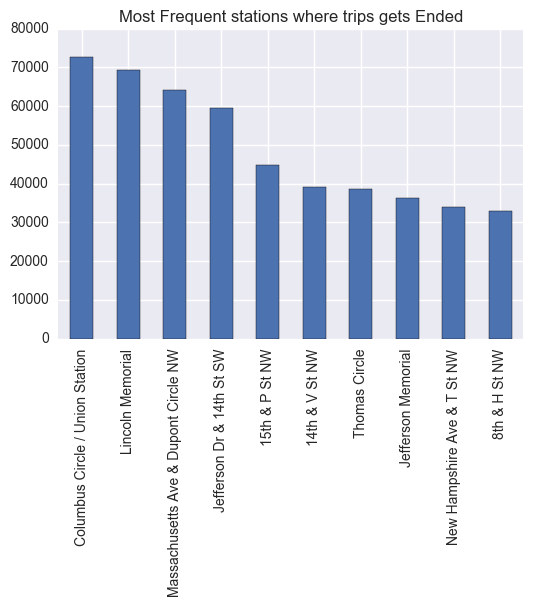

In [23]:
l =  data_new['End station'].value_counts().head(10)
l.plot(kind = 'bar', title = "Most Frequent stations where trips gets Ended")

Since we have idea of most busiest stations we also make bring out a new variable., What are one-way stations which are mostly used by users

In [24]:
data_new['One_way_Stations'] = data_new['Start station'] + " " + 'to' + " " + data_new['End station']

C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
print data_new['One_way_Stations'].value_counts().head(10)

Jefferson Dr & 14th St SW to Lincoln Memorial                                         7973
Lincoln Memorial to Jefferson Memorial                                                7765
Jefferson Dr & 14th St SW to Jefferson Dr & 14th St SW                                7744
Lincoln Memorial to Jefferson Dr & 14th St SW                                         7377
Lincoln Memorial to Lincoln Memorial                                                  6015
Columbus Circle / Union Station to 8th & F St NE                                      5217
Smithsonian / Jefferson Dr & 12th St SW to Smithsonian / Jefferson Dr & 12th St SW    4508
8th & F St NE to Columbus Circle / Union Station                                      4502
Smithsonian / Jefferson Dr & 12th St SW to Lincoln Memorial                           4311
Jefferson Memorial to Lincoln Memorial                                                4107
Name: One_way_Stations, dtype: int64


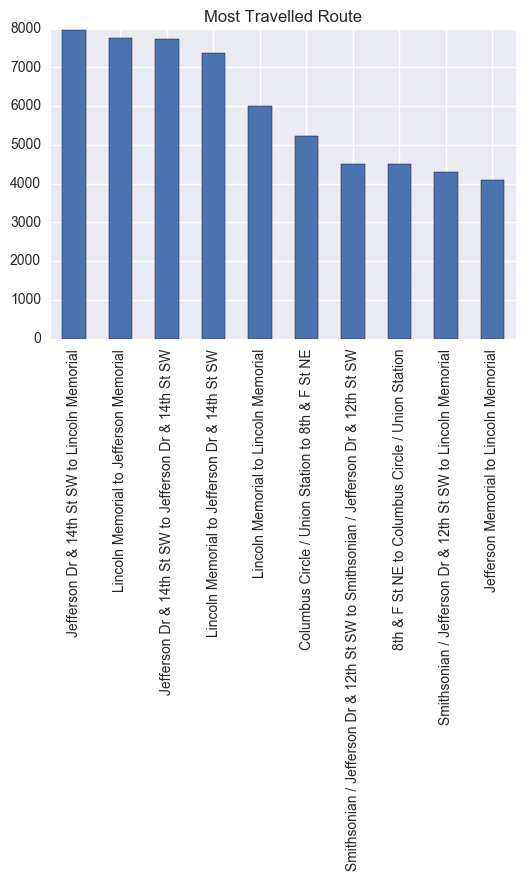

In [26]:
l =  data_new['One_way_Stations'].value_counts().head(10)
l.plot(kind = 'bar', title = "Most Travelled Route")

In [16]:
#Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [17]:
# suppress scientific float notation
np.set_printoptions(precision=5, suppress=True) 

In [3]:
from datetime import datetime

In [34]:
data_new['Start date'] = pd.to_datetime(data_new['Start date'])
data_new['End date'] = pd.to_datetime(data_new['End date'])
data_new.head()

C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Bike number,Duration (ms),Duration_min,End date,End station,Quater,Start date,Start station,Subscription type,One_way_Stations
0,W00612,2394764,39.912733,2015-01-01 00:42:00,15th & K St NW,1,2015-01-01 00:02:00,Constitution Ave & 2nd St NW/DOL,Casual,Constitution Ave & 2nd St NW/DOL to 15th & K S...
1,W01140,2389161,39.819350,2015-01-01 00:42:00,15th & K St NW,1,2015-01-01 00:02:00,Constitution Ave & 2nd St NW/DOL,Casual,Constitution Ave & 2nd St NW/DOL to 15th & K S...
2,W01226,468047,7.800783,2015-01-01 00:12:00,20th & O St NW / Dupont South,1,2015-01-01 00:04:00,20th & E St NW,Registered,20th & E St NW to 20th & O St NW / Dupont South
3,W20216,348068,5.801133,2015-01-01 00:13:00,15th & Euclid St NW,1,2015-01-01 00:07:00,Park Rd & Holmead Pl NW,Registered,Park Rd & Holmead Pl NW to 15th & Euclid St NW
4,W21005,980844,16.347400,2015-01-01 00:25:00,Thomas Circle,1,2015-01-01 00:09:00,Jefferson Dr & 14th St SW,Casual,Jefferson Dr & 14th St SW to Thomas Circle


In [35]:
data_new.dtypes

Bike number                  object
Duration (ms)                 int64
Duration_min                float64
End date             datetime64[ns]
End station                  object
Quater                        int64
Start date           datetime64[ns]
Start station                object
Subscription type            object
One_way_Stations             object
dtype: object

In [38]:
data_new['Bike number'] = data_new['Bike number'].astype('category')
data_new['End station'] = data_new['End station'].astype('category')
data_new['Quater'] = data_new['Quater'].astype('category')
data_new['Start station'] = data_new['Start station'].astype('category')
data_new['Subscription type'] = data_new['Subscription type'].astype('category')
data_new['One_way_Stations'] = data_new['One_way_Stations'].astype('category')


C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [39]:
data_new.dtypes

Bike number                category
Duration (ms)                 int64
Duration_min                float64
End date             datetime64[ns]
End station                category
Quater                     category
Start date           datetime64[ns]
Start station              category
Subscription type          category
One_way_Stations           category
dtype: object

In [40]:
cat_columns = data_new.select_dtypes(['category']).columns

In [41]:
cat_columns

Index([u'Bike number', u'End station', u'Quater', u'Start station',
       u'Subscription type', u'One_way_Stations'],
      dtype='object')

In [43]:
data_new[cat_columns] = data_new[cat_columns].apply(lambda x: x.cat.codes)

C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\pandas\core\frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [46]:
data_new.head(3)

,Bike number,Duration (ms),Duration_min,End date,End station,Quater,Start date,Start station,Subscription type,One_way_Stations
0,562,2394764,39.912733,2015-01-01 00:42:00,38,0,2015-01-01 00:02:00,177,0,29727
1,1068,2389161,39.819350,2015-01-01 00:42:00,38,0,2015-01-01 00:02:00,177,0,29727
2,1152,468047,7.800783,2015-01-01 00:12:00,73,0,2015-01-01 00:04:00,71,1,13604


In [48]:
data_up = data_new.copy()

In [49]:
del data_new['Duration_min']

In [52]:
del data_new['Duration (ms)'] 
del data_new['End date']
del data_new['Start date']

In [54]:
data_new.head(1)

,Bike number,End station,Quater,Start station,Subscription type,One_way_Stations
0,562,38,0,177,0,29727


In [67]:
#generate linkage matrix
Z = linkage(data_new, 'ward')

MemoryError: 

In [5]:
Xdata = data_1.copy()

In [6]:
Xdata['Start date'] = pd.to_datetime(Xdata['Start date'])
Xdata['End date'] = pd.to_datetime(Xdata['End date'])

In [7]:
Xdata.dtypes

Total duration (ms)             int64
Start date             datetime64[ns]
Start station                  object
End date               datetime64[ns]
End station                    object
Bike number                    object
Subscription Type              object
dtype: object

In [9]:
Xdata['Bike number'] = Xdata['Bike number'].astype('category')
Xdata['End station'] = Xdata['End station'].astype('category')
Xdata['Start station'] = Xdata['Start station'].astype('category')
Xdata['Subscription Type'] = Xdata['Subscription Type'].astype('category')

In [10]:
Xdata.dtypes

Total duration (ms)             int64
Start date             datetime64[ns]
Start station                category
End date               datetime64[ns]
End station                  category
Bike number                  category
Subscription Type            category
dtype: object

In [11]:
cat_columns = Xdata.select_dtypes(['category']).columns

In [12]:
Xdata[cat_columns] = Xdata[cat_columns].apply(lambda x: x.cat.codes)

In [14]:
Xdata.head()

,Total duration (ms),Start date,Start station,End date,End station,Bike number,Subscription Type
0,2394764,2015-01-01 00:02:00,170,2015-01-01 00:42:00,36,541,0
1,2389161,2015-01-01 00:02:00,170,2015-01-01 00:42:00,36,1020,0
2,468047,2015-01-01 00:04:00,69,2015-01-01 00:12:00,71,1098,1
3,348068,2015-01-01 00:07:00,282,2015-01-01 00:13:00,34,1541,1
4,980844,2015-01-01 00:09:00,219,2015-01-01 00:25:00,326,2288,0


In [19]:
del Xdata['Total duration (ms)']
del Xdata['Start date']
del Xdata['End date']

In [27]:
#generate linkage matrix
Xdata.shape
Z = linkage(Xdata[0:1000], 'ward')

In [29]:

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(Xdata[0:1000]))
c

0.74241602345403312

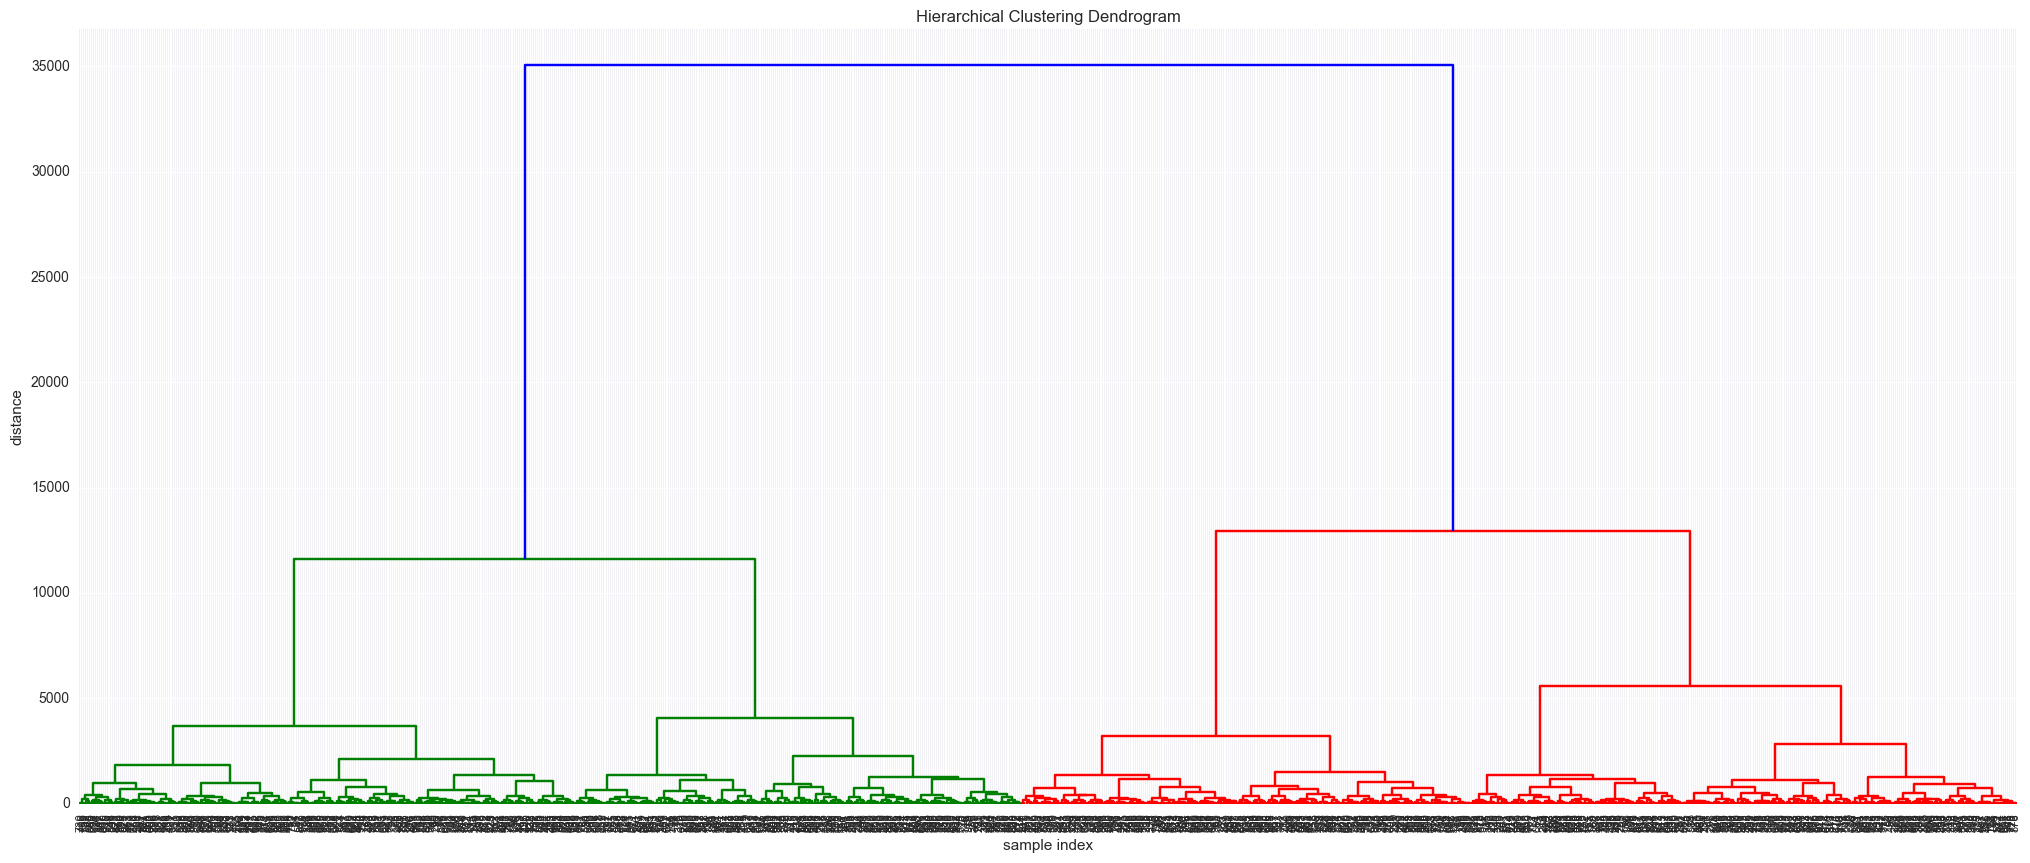

In [30]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()